In [ ]:
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
def visualize_input(img, ax):
            ax.imshow(img, cmap='gray')
            width, height = img.shape
            thresh = img.max()/2.5
            for x in range(width):
                for y in range(height):
                    ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                                horizontalalignment='center',
                                verticalalignment='center',
                           color='white' if img[x][y]<thresh else 'black')

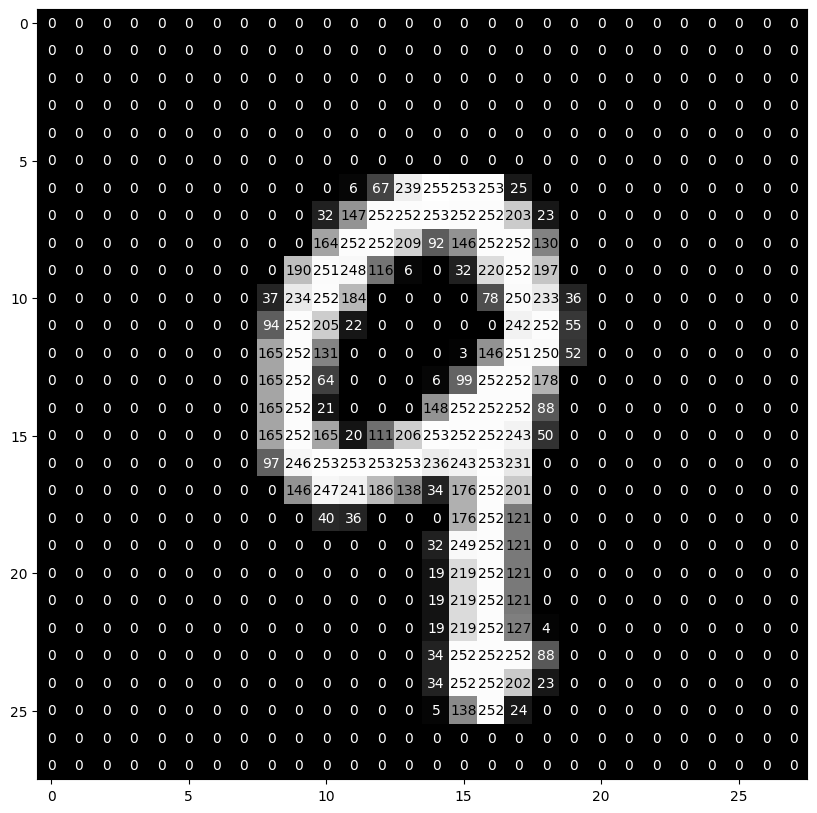

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(x_train[350], ax)
plt.show()

In [ ]:
y_train.shape

(60000,)

In [ ]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:
x_train=x_train/255
x_test = x_test/255

In [ ]:
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(392, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 63s 41ms/step - loss: 0.1450 - accuracy: 0.9560 - val_loss: 0.0631 - val_accuracy: 0.9815
Epoch 2/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0630 - val_accuracy: 0.9819
Epoch 3/10
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0522 - val_accuracy: 0.9852
Epoch 4/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0619 - val_accuracy: 0.9837
Epoch 5/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0574 - val_accuracy: 0.9847
Epoch 6/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0578 - val_accuracy: 0.9862
Epoch 7/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 0.0675 -

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.95

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=2, validation_split=0.2, callbacks=[LearningRateScheduler(scheduler)])


Epoch 1/2
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.0797 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 2/2
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0999 - val_accuracy: 0.9865 - lr: 0.0010


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)

313/313 [==============================] - 5s 16ms/step
[7 2 1 ... 4 5 6]


In [ ]:
from keras.preprocessing import image

1/1 [==============================] - 0s 122ms/step


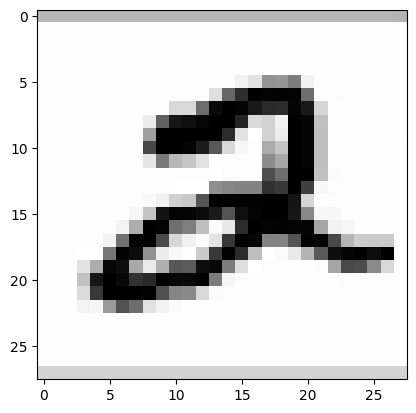

In [ ]:
img = image.load_img(path="/content/data.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [ ]:
prediction

2

In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.9852

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 972,    1,    1,    0,    0,    0,    3,    1,    4,    1],
       [   1, 1129,    1,    1,    0,    1,    2,    4,    0,    3],
       [   1,    1, 1013,    3,    0,    0,    0,    6,    2,    0],
       [   1,    1,    3, 1002,    0,   19,    1,    5,    5,    5],
       [   0,    0,    1,    0,  975,    0,    1,    0,    0,    6],
       [   0,    1,    0,    1,    0,  866,    1,    0,    1,    0],
       [   4,    2,    2,    0,    3,    5,  949,    0,    3,    1],
       [   0,    0,    6,    1,    0,    0,    0, 1007,    2,    3],
       [   1,    0,    5,    2,    1,    1,    1,    1,  956,    7],
       [   0,    0,    0,    0,    3,    0,    0,    4,    1,  983]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.99      0.99      0.99      1142
           2       0.98      0.99      0.98      1026
           3       0.99      0.96      0.98      1042
           4       0.99      0.99      0.99       983
           5       0.97      1.00      0.98       870
           6       0.99      0.98      0.98       969
           7       0.98      0.99      0.98      1019
           8       0.98      0.98      0.98       975
           9       0.97      0.99      0.98       991

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:

model.save("mnist.hdf5")

